# Imports

In [1]:
import os
import time
from meeting_corpus_util import *
from SphereDiar import *


Using TensorFlow backend.


## Transcriptions

In [2]:
# Create transcriptions labels and perform SAD

path = "/m/teamwork/t40511_asr/p/SSD_system/git_repo"
audio_path = "/".join([path, "audio"])
tc_asr_path = "/".join([path, "transcriptions", "ASR"])
tc_word_path = "/".join([path, "transcriptions", "words"])

audio_file = "Bro023.interaction.wav"
sig, transcript_lab = transcript_label_generator(audio_file, [audio_path, tc_word_path, tc_asr_path])

In [3]:
# Load SphereSpeaker model
model_path = "/".join([path, "models"])
os.chdir(model_path)
SS_model = load_model("SphereSpeaker.hdf")

In [4]:
SD = SphereDiar(SS_model)
X = SD.extract_features(sig)

In [5]:
F = SD.get_embeddings()

In [6]:
SD = SphereDiar(SS_model)
SD.cluster(embeddings = F, rounds = 3)

Clustering round:  0
Clustering round:  1
Clustering round:  2


Computing TSNE transform...


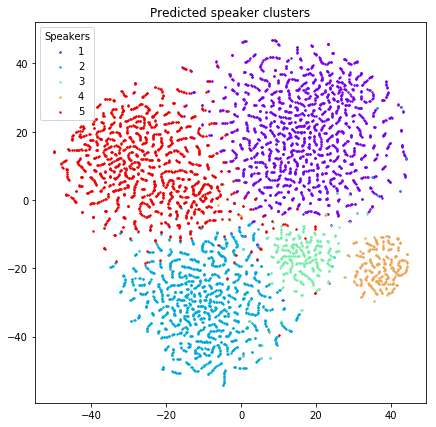

In [7]:
SD.visualize()